<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_4_with_QuantileTRANDFORM_LOGISTIC_MULTIVARIARE_REGRESSION_FOR_kELP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########       https://statinfer.com/204-2-3-multiple-logistic-regression/

In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 33.7 MB/s eta 0:00:00


In [3]:
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
import os
kelp_files = os.listdir('/content/drive/MyDrive/kelp_files_only')

train_satellite_data_with_kelp_data_list_swir =[]
train_satellite_data_with_kelp_data_list_nir =[]
train_satellite_data_with_kelp_data_list_red =[]
train_satellite_data_with_kelp_data_list_green =[]
train_satellite_data_with_kelp_data_list_blue =[]
train_satellite_data_with_kelp_data_list_index=[]
train_satellite_data_with_kelp_data_list_ndvi=[]
train_satellite_data_with_kelp_data_list_mndwi=[]
train_satellite_kelp_file_list =[] ##### selecting 100 train satellite kelp images for trainingn with label y=1
for file in kelp_files[0:100]:

    with rasterio.open(os.path.join('/content/drive/MyDrive/kelp_files_only',file)) as src:   ################   3527 train_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      train_INDEX = es.normalized_diff(swir,nir)
      train_NDVI = es.normalized_diff(green,nir)
      train_MNDWI = es.normalized_diff(green,swir)


      train_satellite_data_with_kelp_data_list_ndvi.append(train_NDVI)
      train_satellite_data_with_kelp_data_list_mndwi.append(train_MNDWI)
      train_satellite_data_with_kelp_data_list_swir.append(swir)
      train_satellite_data_with_kelp_data_list_nir.append(nir)
      train_satellite_data_with_kelp_data_list_red.append(red)
      train_satellite_data_with_kelp_data_list_green.append(green)
      train_satellite_data_with_kelp_data_list_blue.append(blue)
      train_satellite_data_with_kelp_data_list_index.append(train_INDEX)


      train_satellite_kelp_file_list.append(file)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [4]:

binary_kelp_data =[]
for file in kelp_files[0:100]:    ############# 1000 images to filter kelp pixels from train_satellite data

    with rasterio.open(os.path.join('/content/drive/MyDrive/train_kelp',file)) as src:
      data = src.read(1)
      binary_kelp_data.append(data)

In [5]:

###### this code filters kelp pixels from kelp pixels of train_satellite kelp data....
Kelp_only_NDVI_pixels_list = []
Kelp_only_MNDWI_pixels_list = []
Kelp_only_swir_pixels_list = []
Kelp_only_nir_pixels_list = []
Kelp_only_red_pixels_list = []
Kelp_only_green_pixels_list = []
Kelp_only_blue_pixels_list = []
Kelp_only_INDEX_pixels_list =[]


for i in range(0,len(train_satellite_data_with_kelp_data_list_ndvi)):     ##### using only NDVI pixels for kelp.....1000 files
  A_ndvi = train_satellite_data_with_kelp_data_list_ndvi[i]
  A_mndwi = train_satellite_data_with_kelp_data_list_mndwi[i]
  A_swir = train_satellite_data_with_kelp_data_list_swir[i]
  A_nir = train_satellite_data_with_kelp_data_list_nir[i]
  A_red = train_satellite_data_with_kelp_data_list_red[i]
  A_green = train_satellite_data_with_kelp_data_list_green[i]
  A_blue = train_satellite_data_with_kelp_data_list_blue[i]
  A_index = train_satellite_data_with_kelp_data_list_index[i]
  B = binary_kelp_data[i]                                          #########  1000 files
  for j in range(350):                                                 ### shape of each image is 350x350
    for k in range(350):
      if  (B[j][k] != 0 ) :

          Kelp_only_NDVI_pixels_list.append(A_ndvi[j][k])
          Kelp_only_MNDWI_pixels_list.append(A_mndwi[j][k])
          Kelp_only_swir_pixels_list.append(A_swir[j][k])
          Kelp_only_nir_pixels_list.append(A_nir[j][k])
          Kelp_only_red_pixels_list.append(A_red[j][k])
          Kelp_only_green_pixels_list.append(A_green[j][k])
          Kelp_only_blue_pixels_list.append(A_blue[j][k])
          Kelp_only_INDEX_pixels_list.append(A_index[j][k])



In [6]:
############# now collect ndvi and mndwi pixels of not_kelp train_satellite data
Not_kelp_swir_pixels_list=[]
Not_kelp_nir_pixels_list=[]
Not_kelp_red_pixels_list=[]
Not_kelp_green_pixels_list=[]
Not_kelp_blue_pixels_list=[]
Not_kelp_NDVI_pixels_list = []
Not_kelp_MNDWI_pixels_list=[]
Not_kelp_INDEX_pixels_list =[]


not_kelp_files = os.listdir('/content/drive/MyDrive/not_kelp_files')
for file in not_kelp_files[0:50]:                                          #### 50 files not kelp data

    with rasterio.open(os.path.join('/content/drive/MyDrive/not_kelp_files',file)) as src:   ################   3527 train_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      not_kelp_train_INDEX = es.normalized_diff(swir,nir)
      not_kelp_train_NDVI = es.normalized_diff(green,nir)
      not_kelp_train_MNDWI = es.normalized_diff(green,swir)
      A = not_kelp_train_NDVI
      B = not_kelp_train_MNDWI
      C = not_kelp_train_INDEX
      #show(C)
      a = A.flatten()
      b = B.flatten()
      c = swir.flatten()
      d = nir.flatten()
      e = red.flatten()
      f = green.flatten()
      g = blue.flatten()
      h= C.flatten()
      for j in range(0,len(a)):
        Not_kelp_NDVI_pixels_list.append(a[j])
        Not_kelp_MNDWI_pixels_list.append(b[j])
        Not_kelp_swir_pixels_list.append(c[j])
        Not_kelp_nir_pixels_list.append(d[j])
        Not_kelp_red_pixels_list.append(e[j])
        Not_kelp_green_pixels_list.append(f[j])
        Not_kelp_blue_pixels_list.append(g[j])
        Not_kelp_INDEX_pixels_list.append(h[j])



In [7]:
Not_kelp_NDVI_pixels_list[0:10]

[0.004963094935097989,
 0.027487562189054727,
 0.027487562189054727,
 0.004963094935097989,
 0.04808424257802588,
 0.004963094935097989,
 0.004963094935097989,
 0.027487562189054727,
 0.027487562189054727,
 0.004963094935097989]

In [8]:
Kelp_only_NDVI_pixels_list[0:10]

[-0.050490965080471795,
 -0.07689558639585443,
 -0.029745294781214748,
 -0.04521719808910121,
 -0.0966952264381885,
 -0.0703680527902611,
 -0.050490965080471795,
 -0.050490965080471795,
 -0.050490965080471795,
 -0.0703680527902611]

In [9]:
len(Not_kelp_NDVI_pixels_list)

6125000

In [10]:
len(Kelp_only_NDVI_pixels_list)

127120

In [11]:
NDVI_pixels = Kelp_only_NDVI_pixels_list[0:127100] + Not_kelp_NDVI_pixels_list[0:127100]
MNDWI_pixels = Kelp_only_MNDWI_pixels_list[0:127100] + Not_kelp_MNDWI_pixels_list[0:127100]
swir_pixels = Kelp_only_swir_pixels_list[0:127100] + Not_kelp_swir_pixels_list[0:127100]
nir_pixels = Kelp_only_nir_pixels_list[0:127100] + Not_kelp_nir_pixels_list[0:127100]
red_pixels = Kelp_only_red_pixels_list[0:127100] + Not_kelp_red_pixels_list[0:127100]
green_pixels = Kelp_only_green_pixels_list[0:127100] + Not_kelp_green_pixels_list[0:127100]
blue_pixels = Kelp_only_blue_pixels_list[0:127100] + Not_kelp_blue_pixels_list[0:127100]
INDEX_pixels =  Kelp_only_INDEX_pixels_list[0:127100] + Not_kelp_INDEX_pixels_list[0:127100]

In [12]:
len(NDVI_pixels)

254200

In [13]:
y=[]

In [14]:
for i in range(0,len(NDVI_pixels)):
  if i < 127100:
    y.append(1)
  else:
    y.append(0)

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame()
df['NDVI'] = NDVI_pixels
df['MNDWI'] = MNDWI_pixels
df['swir'] = swir_pixels
df['nir'] = nir_pixels
df['red'] = red_pixels
df['green'] = green_pixels
df['blue'] = blue_pixels
df['INDEX'] = INDEX_pixels


In [17]:
df['y'] =y

In [18]:
df.describe()

,NDVI,MNDWI,swir,nir,red,green,blue,INDEX,y
count,254200.000000,254200.000000,254200.000000,254200.000000,254200.000000,254200.000000,254200.000000,254200.000000,254200.000000
mean,-0.010479,0.034729,7832.360814,8593.096334,8108.808415,8355.736125,8493.324756,-0.045195,0.500000
std,0.049558,0.033594,1092.844133,1332.786750,574.968942,584.486842,587.787206,0.041363,0.500001
min,-0.368859,-0.288589,6814.000000,7185.000000,7147.000000,7156.000000,7184.000000,-0.359856,0.000000
25%,-0.028558,0.027413,7437.000000,7819.000000,7788.000000,8015.000000,8148.000000,-0.067847,0.000000
50%,0.004774,0.038210,7618.000000,8331.000000,7997.000000,8260.000000,8446.000000,-0.039052,0.500000
75%,0.027313,0.052189,7809.000000,8845.000000,8163.000000,8445.000000,8636.000000,-0.019083,1.000000
max,0.134488,0.453731,19724.000000,23864.000000,24175.000000,24664.000000,65535.000000,0.126617,1.000000


In [ ]:
#################  load test data to predict pixels as 0 or 1 for kelp classification

In [85]:
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
import os
test_files = os.listdir('/content/drive/MyDrive/test_satellite')

test_satellite_data_with_data_list_swir =[]
test_satellite_data_with_data_list_nir =[]
test_satellite_data_with_data_list_red =[]
test_satellite_data_with_data_list_green =[]
test_satellite_data_with_data_list_blue =[]

test_satellite_data_with_data_list_ndvi=[]
test_satellite_data_with_data_list_mndwi=[]
test_satellite_data_with_data_list_index=[]
test_satellite_file_list =[] ##### selecting all
for file in test_files:

    with rasterio.open(os.path.join('/content/drive/MyDrive/test_satellite/',file)) as src:   ################   1026 test_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      #train_INDEX = es.normalized_diff(swir,nir)
      test_NDVI = es.normalized_diff(green,nir)
      test_MNDWI = es.normalized_diff(green,swir)
      test_INDEX = es.normalized_diff(swir,nir)


      test_satellite_data_with_data_list_swir.append(swir)
      test_satellite_data_with_data_list_nir.append(nir)
      test_satellite_data_with_data_list_red.append(red)
      test_satellite_data_with_data_list_green.append(green)
      test_satellite_data_with_data_list_blue.append(blue)
      test_satellite_data_with_data_list_ndvi.append(test_NDVI)
      test_satellite_data_with_data_list_mndwi.append(test_MNDWI)
      test_satellite_data_with_data_list_index.append(test_INDEX)
      test_satellite_file_list.append(file)

In [91]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,INDEX,y,Trans_NDVI,trans_NDVI,trans_MNDWI,trans_INDEX,predicted
0,-0.050491,0.028834,7713,9040,7866,8171,8245,-0.079210,1,-1.052237,-1.042874,-0.629481,-0.921411,1
1,-0.076896,0.035893,7212,9040,8191,7749,8034,-0.112478,1,-1.403052,-1.382343,-0.122939,-1.506991,1
2,-0.029745,0.028834,7713,8672,7866,8171,8245,-0.058529,1,-0.692232,-0.699786,-0.629481,-0.483996,1
3,-0.045217,0.070437,7463,9408,8516,8594,8663,-0.115287,1,-0.970104,-0.973796,1.771182,-1.546756,1
4,-0.096695,0.018801,7463,9408,8191,7749,7825,-0.115287,1,-1.572789,-1.564284,-0.981432,-1.546756,1


<Axes: >

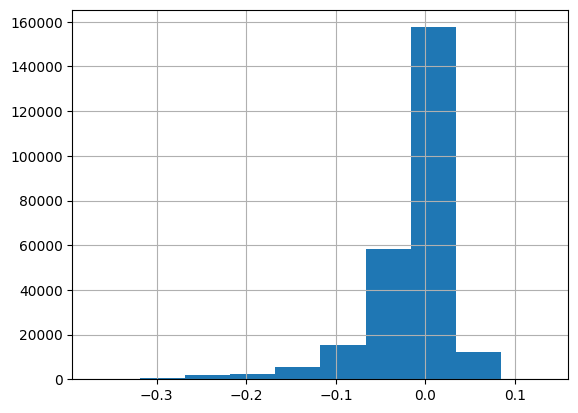

In [92]:
df['NDVI'].hist()

In [93]:
import seaborn as sns

<Axes: xlabel='NDVI', ylabel='Density'>

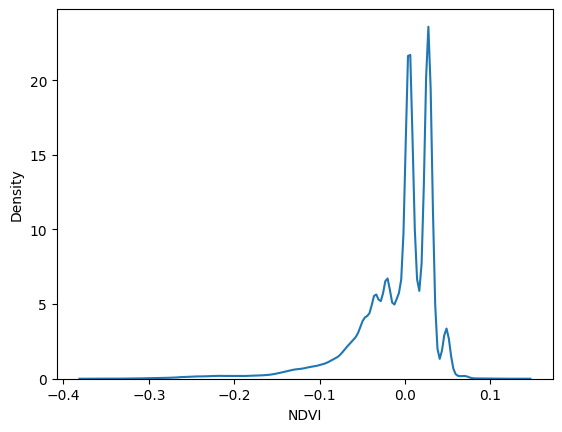

In [94]:
sns.kdeplot(df['NDVI'])

In [ ]:
############                      Improve the model as z score is not good in model summary.....
#####################                 Try to normalize data using Quantile-transform

################# https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

In [56]:
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(X_data)
# histogram of the transformed data


In [ ]:
###############  Transform all data   indices...........

In [63]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

In [86]:
def transform_data(data):
    X_data = data.reshape(data.shape[0],1)
    quantile = QuantileTransformer(output_distribution='normal')
    data_trans = quantile.fit_transform(X_data)
    Y_data = data_trans.reshape(data_trans.shape[0])
    return Y_data



In [67]:
df['trans_NDVI'] = transform_data(np.array(df['NDVI']))
df['trans_MNDWI'] = transform_data(np.array(df['MNDWI']))
df['trans_INDEX'] = transform_data(np.array(df['INDEX']))

<Axes: >

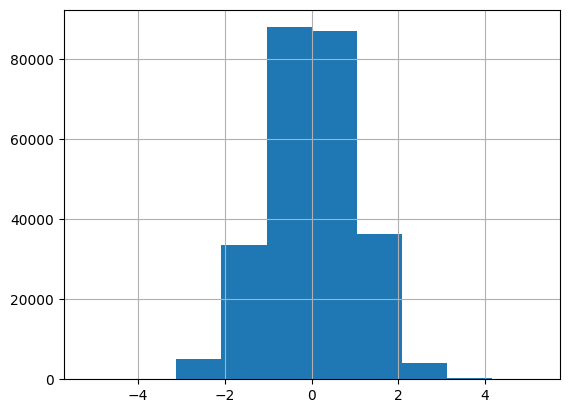

In [95]:
df['trans_INDEX'].hist()

<Axes: >

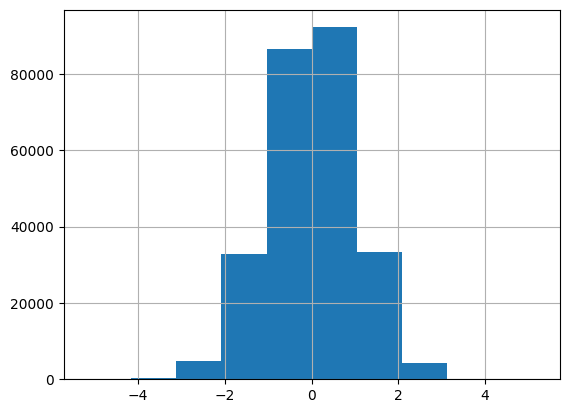

In [96]:
df['trans_NDVI'].hist()

<Axes: >

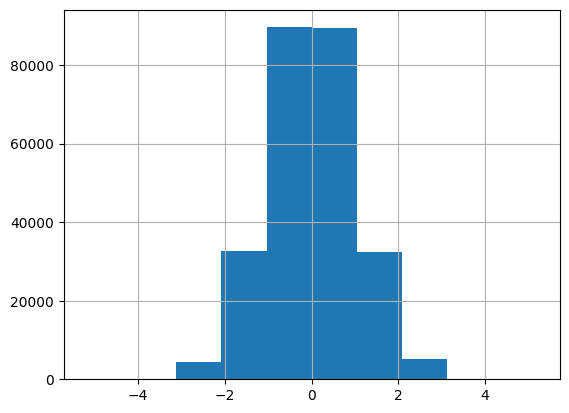

In [97]:
df['trans_MNDWI'].hist()

In [98]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,INDEX,y,Trans_NDVI,trans_NDVI,trans_MNDWI,trans_INDEX,predicted
0,-0.050491,0.028834,7713,9040,7866,8171,8245,-0.079210,1,-1.052237,-1.042874,-0.629481,-0.921411,1
1,-0.076896,0.035893,7212,9040,8191,7749,8034,-0.112478,1,-1.403052,-1.382343,-0.122939,-1.506991,1
2,-0.029745,0.028834,7713,8672,7866,8171,8245,-0.058529,1,-0.692232,-0.699786,-0.629481,-0.483996,1
3,-0.045217,0.070437,7463,9408,8516,8594,8663,-0.115287,1,-0.970104,-0.973796,1.771182,-1.546756,1
4,-0.096695,0.018801,7463,9408,8191,7749,7825,-0.115287,1,-1.572789,-1.564284,-0.981432,-1.546756,1


In [99]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()

In [108]:
logistic.fit(df[['trans_NDVI']+['trans_MNDWI']+['trans_INDEX']], df['y'])

LogisticRegression()

In [109]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [110]:
predict_df=logistic.predict(df[['trans_NDVI']+['trans_MNDWI']+['trans_INDEX']])
df['predicted'] = predict_df

In [111]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,INDEX,y,Trans_NDVI,trans_NDVI,trans_MNDWI,trans_INDEX,predicted
0,-0.050491,0.028834,7713,9040,7866,8171,8245,-0.079210,1,-1.052237,-1.042874,-0.629481,-0.921411,1
1,-0.076896,0.035893,7212,9040,8191,7749,8034,-0.112478,1,-1.403052,-1.382343,-0.122939,-1.506991,1
2,-0.029745,0.028834,7713,8672,7866,8171,8245,-0.058529,1,-0.692232,-0.699786,-0.629481,-0.483996,1
3,-0.045217,0.070437,7463,9408,8516,8594,8663,-0.115287,1,-0.970104,-0.973796,1.771182,-1.546756,1
4,-0.096695,0.018801,7463,9408,8191,7749,7825,-0.115287,1,-1.572789,-1.564284,-0.981432,-1.546756,1


In [112]:
df['predicted'].value_counts()

0    134021
1    120179
Name: predicted, dtype: int64

In [113]:
df['y'].value_counts()

1    127100
0    127100
Name: y, dtype: int64

In [ ]:
###############   this is result after normalizing indices....

In [114]:
#What are the most impacting variables?
#### From summary of the model


import statsmodels.api as sm
logit1=sm.Logit(df['y'],df[['trans_NDVI']+['trans_MNDWI']+['trans_INDEX']])

logit1

In [115]:
result=logit1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               254200
Model:                          Logit   Df Residuals:                   254197
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.4558
Time:                        23:18:25   Log-Likelihood:                -95884.
converged:                       True   LL-Null:                   -1.7620e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
trans_NDVI     -0.5280      0.021    -25.332      0.000      -0.569      -0.487
trans_MNDWI    -0.0089      0.016     -0.557      0.577      -0.040       0.022
trans_INDEX    -2.3277      0.023   -101.001      0.000      -2.373      -2.283
===============================================================================
"""

In [ ]:
##########   still   Z is not according to desired one....

In [ ]:

logistic= LogisticRegression()
logistic.fit(df[['trans_NDVI']+['trans_MNDWI']+['trans_INDEX']], df['y'])   #### fit on TRAINING DATA IN DF
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
id = 0
for file in test_satellite_file_list:
    test_df = pd.DataFrame()
    test_df['swir'] = np.array(test_satellite_data_with_data_list_swir[id].flatten())
    test_df['nir'] = np.array(test_satellite_data_with_data_list_nir[id].flatten())
    test_df['NDVI'] = np.array(test_satellite_data_with_data_list_ndvi[id].flatten())
    test_df['MNDWI'] = np.array(test_satellite_data_with_data_list_mndwi[id].flatten())
    test_df['red'] = np.array(test_satellite_data_with_data_list_red[id].flatten())
    test_df['green'] = np.array(test_satellite_data_with_data_list_green[id].flatten())
    test_df['blue'] = np.array(test_satellite_data_with_data_list_blue[id].flatten())
    test_df['INDEX'] = np.array(test_satellite_data_with_data_list_index[id].flatten())

    id+=1                      ######## increment id by 1 for next image data

    trans_NDVI = transform_data(np.array(test_df['NDVI']))
    trans_MNDWI = transform_data(np.array(test_df['MNDWI']))
    trans_INDEX = transform_data(np.array(test_df['INDEX']))


    test_df['trans_NDVI'] = trans_NDVI
    test_df['trans_MNDWI'] = trans_MNDWI
    test_df['trans_INDEX'] = trans_INDEX
    predict_df=logistic.predict(test_df[['trans_NDVI']+['trans_MNDWI']+['trans_INDEX']])  ### Predict on Test data in test_df
    test_df['predicted'] = predict_df
    image = np.array(predict_df)
    image = image.reshape(350,350)
    with rasterio.open('/content/drive/MyDrive/test_satellite/'+file) as src:
      profile = src.profile
      profile.update(dtype=rasterio.uint8,count=1)
      s = file.split('_')
      ss = s[0] + '_kelp.tif'
      with rasterio.open('/content/drive/MyDrive/RADHA_KRISHNA/'+ss,'w',**profile) as dst:
        dst.write(image,1)